In [ ]:
import numpy as np
import collections
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.optimize
import sympy
import pandas as pd

#доопределим данные в точке 0 мясяцев = -0.700
curve_tenors = np.array([0.0, 1/12, 1/6, 0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20.0, 30.0])
curve_rates = np.array([-0.700, -0.700, -0.750, -0.700, -0.580, -0.600, -0.375, -0.194, -0.120, -0.008, -0.004, 0.165, 0.225, 0.301, 0.355, 0.491, 0.489, 0.473])*1e-2
f = scipy.interpolate.interp1d(curve_tenors, curve_rates, kind = 'cubic')

dr = 1e-4

# Задача № 1

In [ ]:
pd.to_datetime('06.28.2022') - pd.to_datetime('09.28.2021')

Timedelta('273 days 00:00:00')

In [ ]:
days = np.array([273, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360])
payments = np.array([5 / 360 * 273, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1005])

years = np.cumsum(days) / 360
rates = f(years)

def pv(rates, years, payments):
    df = np.power(1 / (rates + 1.0), years)
    return np.sum(df*payments)

dv01 = 0.5 * (pv(rates + dr, years, payments) - pv(rates - dr, years, payments))
dv01

-2.260595984066697

# Задача № 2

### Пункт 1

In [ ]:
pd.to_datetime('06.23.2022') - pd.to_datetime('03.23.2022')

Timedelta('92 days 00:00:00')

In [ ]:
new_days = np.array([92, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360, 360])
new_payments = np.array([2.5/360 * 92, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 1002.5])

new_years = np.cumsum(new_days) / 360
new_rates = f(new_years)
dv01_hedge = 0.5 * (pv(new_rates + dr, new_years, new_payments) - pv(new_rates - dr, new_years, new_payments))

dv01_trade = dv01

beta = - dv01_trade / dv01_hedge
beta

-1.7880381401593644

### Пункт 2

In [ ]:
delta = np.arange(dr-1e-3, dr+1e-3, 1e-4)
pv_y = [pv(rates + i, years, payments) + beta*pv(new_rates + i, new_years, new_payments) for i in delta]

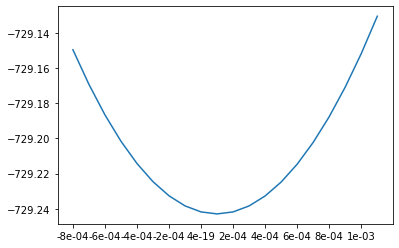

In [ ]:
labels = []

for i in delta[1::2]:
    labels.append('%.0e' % i)

plt.xticks(delta[::2], labels)
plt.plot(delta, pv_y)